# Analysis of Civilization Collapse Data

    "Great civilisations are not murdered. Instead, they take their own lives." -- Arnold Toynbee (historian)

## References

1. "Are we on the road to civilisation collapse?", Luke Kemp, BBC Future, 18 Feb 2019 ([link to article](https://www.bbc.com/future/article/20190218-are-we-on-the-road-to-civilisation-collapse))
1. "How long do civilizations last?", EnergySkeptic, [Part1](https://energyskeptic.com/2019/part-1-how-long-do-civilizations-last/) and [Part2](https://energyskeptic.com/2019/part-2-how-long-do-civilizations-last-on-average-336-years/)
1. "Why We May Be Surrounded by Older Alien Civilizations", Prof. David Kipping (Cool Worlds Lab), Dept. of Astronomy, Columbia Univ., ([link to video](https://youtu.be/LrrNu_m_9K4))

## Data

Ancient civilization lifetimes in years. [Reference 1]

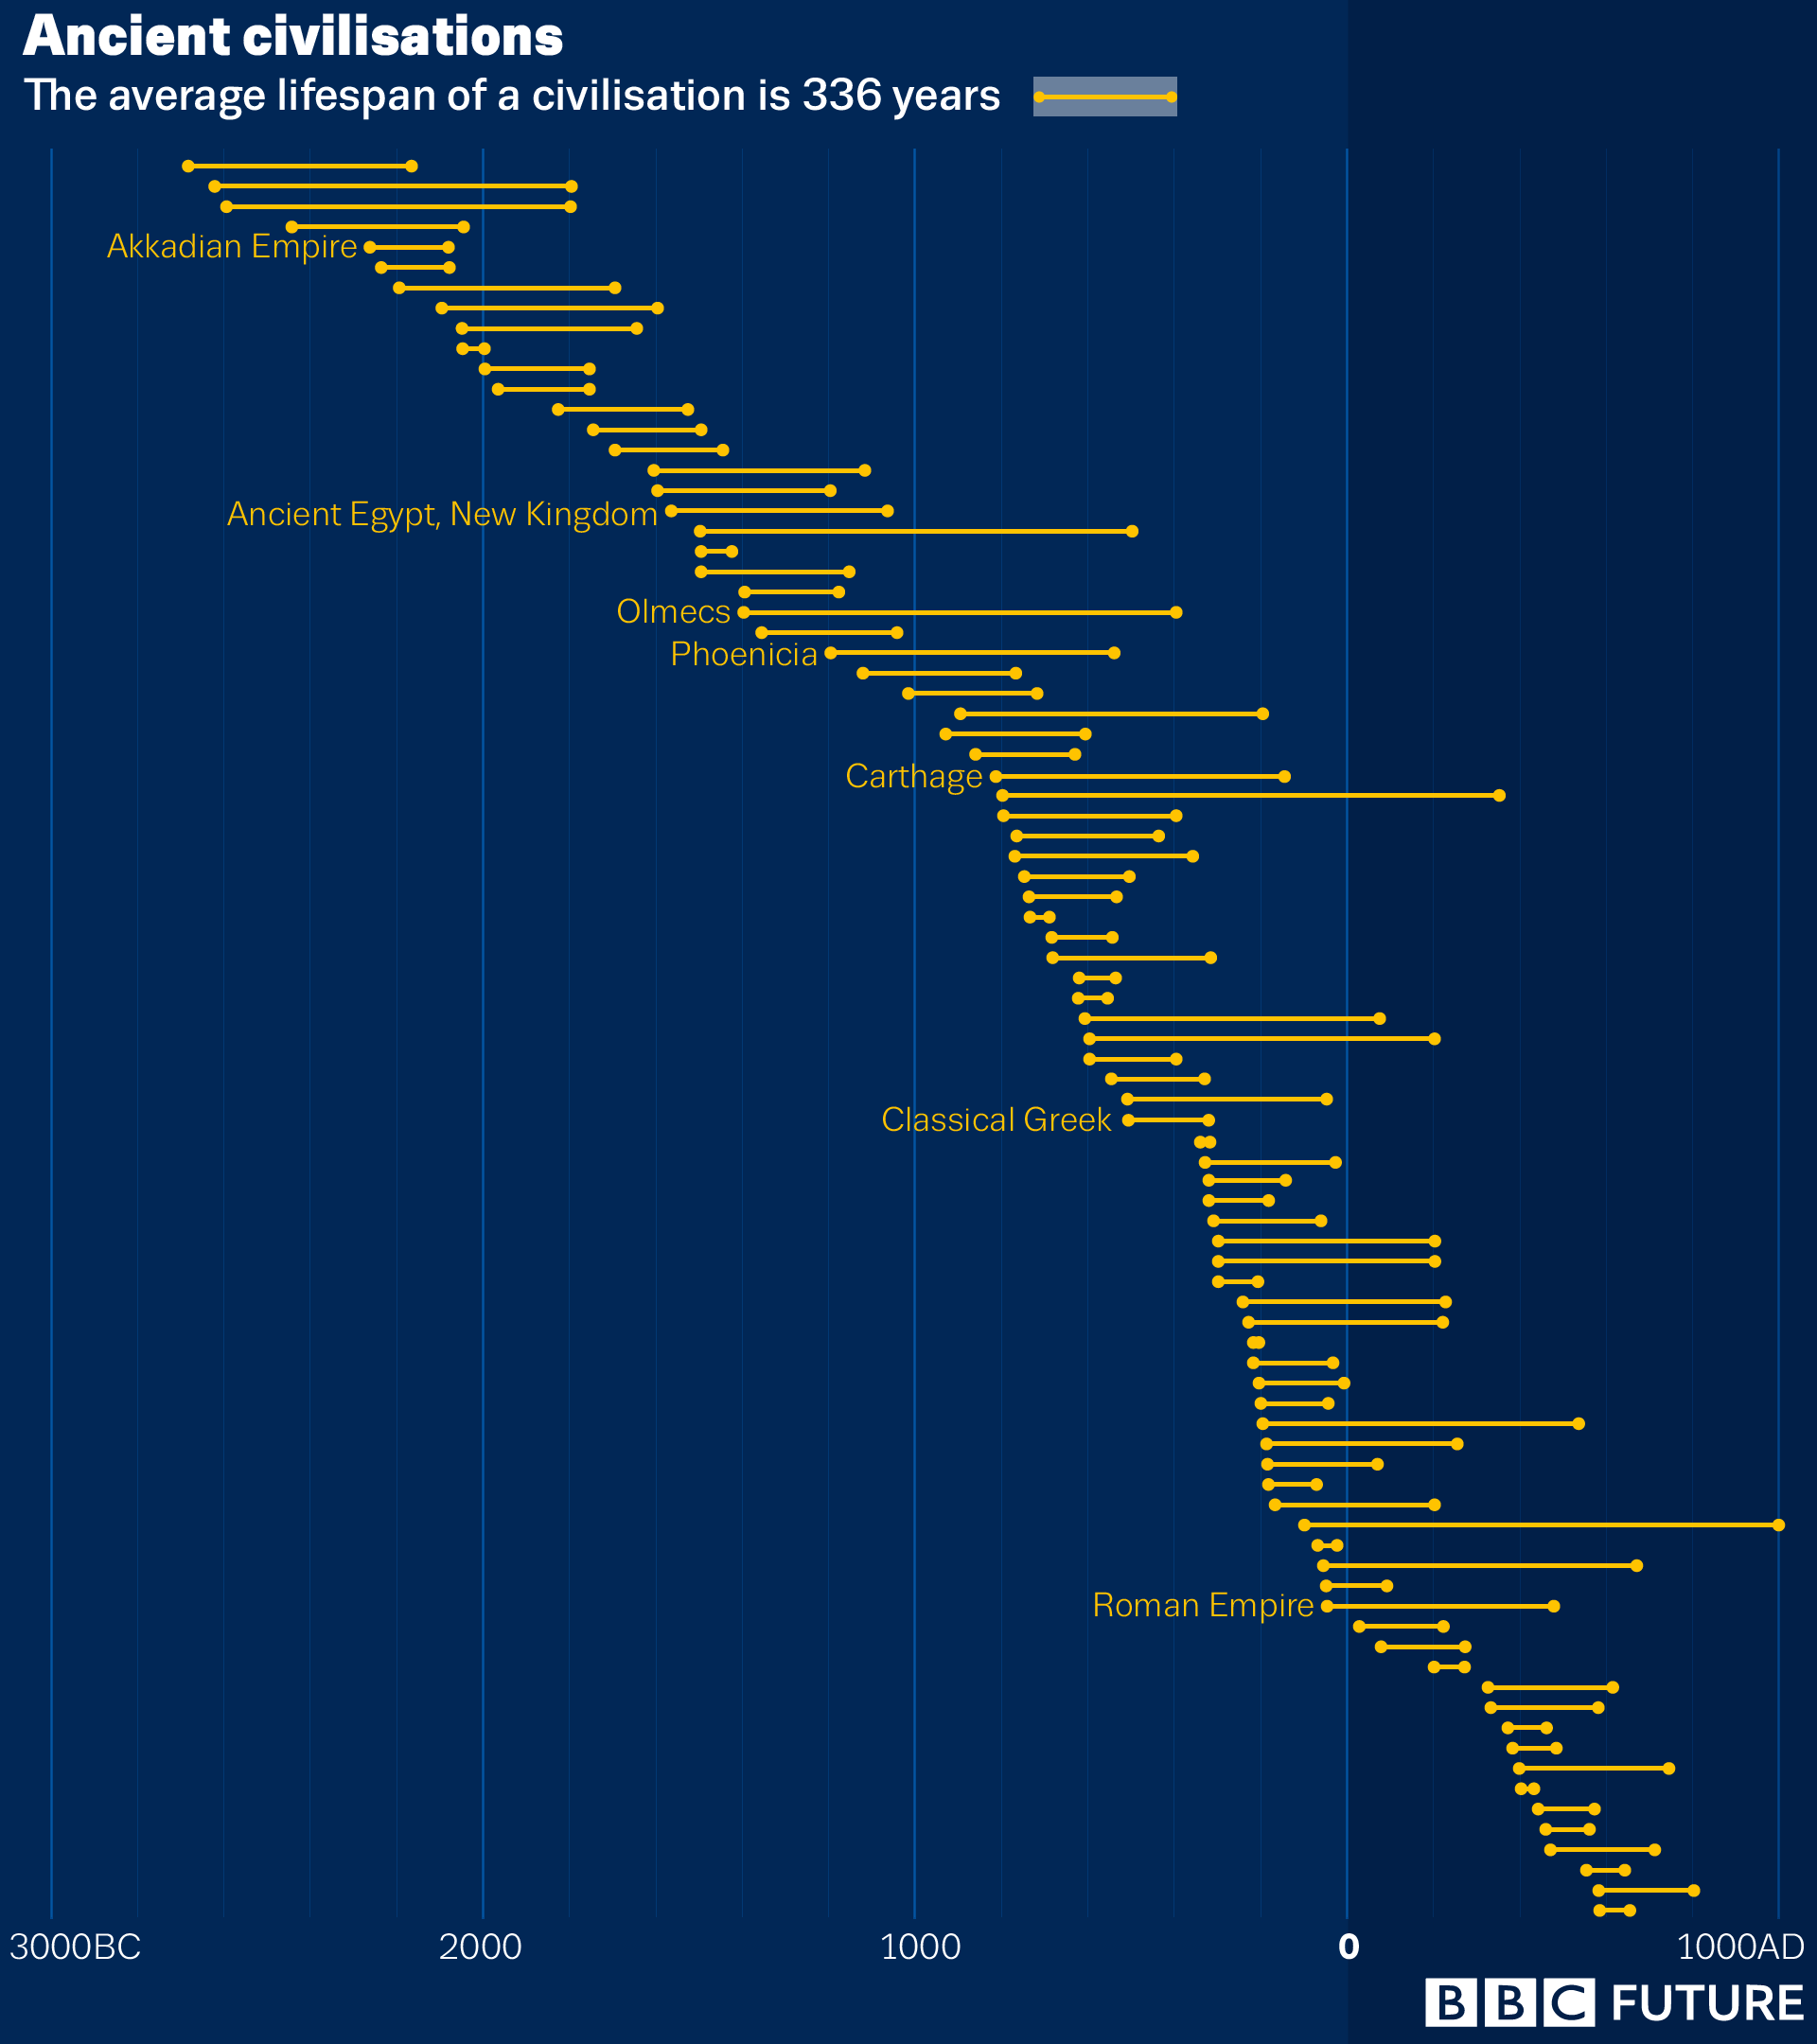

In [1]:
from IPython.display import Image
Image(filename='p0715m80.png') 

The data for the figure, above, is as follows:

In [2]:
civilization_lifetimes = {
    "Xia Dynasty": 500,
    "Third Dynasty of Ur": 46,
    "Old Assyrian Empire": 241,
    "Middle Assyrian Empire": 313,
    "Neo Assyrian Empire": 322,
    "Elam Civilisation (Eparti Dynasty)": 210,
    "First Babylonian Dynasty": 299,
    "Old Hittie Empire": 250,
    "Minoan Civilisation (Neopalatial)": 250,
    "Shang Dynasty": 478,
    "Mycenae": 400,
    "Vedic Civilisation": 1000,
    "Middle Hittite Kingdom": 70,
    "Elam Civilisation (Middle Elamite Period)": 342,
    "New Hittite Kingdom": 220,
    "Olmecs": 1000,
    "Phoenicia": 661,
    "Zhou Dynasty (Western Period)": 351,
    "Kingdom of Israel and Judah": 298,
    "Chavin Culture": 700,
    "Urartu": 225,
    "Kushite Kingdom": 1150,
    "Etruscans": 404,
    "Zhou Dynasty (Eastern Zhou Spring Period)": 330,
    "Zhou Dynasty (Eastern Zhou Warring States Period)": 411,
    "Ancient Rome": 244,
    "Elam Civilisation (Neo-Elamite Period)": 203,
    "Phrygia": 43,
    "Lydia": 144,
    "Magadha Empire": 364,
    "Chaldean Dynasty (Babylon)": 87,
    "Medean Empire": 66,
    "Orontid Dynasty": 540,
    "Scythians": 800,
    "Mahanjanapadas": 200,
    "Carthage": 667,
    "Achaemenid Empire": 220,
    "Roman Republic": 461,
    "Nanda Empire": 24,
    "Ptolemaic Egypt": 302,
    "Classical Greek": 265,
    "Hellenistic": 177,
    "Maurya Empire": 137,
    "Seleucid Empire": 249,
    "First Chera Empire": 500,
    "Early Chola Empire": 500,
    "Maghada-Maurya": 90,
    "Parthian Empire": 469,
    "Satavahana Dynasty": 450,
    "Qin Dynasty": 14,
    "Xiongnu Empire": 184,
    "Han Dynasty (Western Period)": 197,
    "Numidia": 156,
    "Teotihuacans": 735,
    "Kingdom of Armenia": 442,
    "Hsiung Nu Han": 120,
    "Sunga Empire": 112,
    "Andhra": 370,
    "Aksumite Empire": 1100,
    "Kanva Dynasty": 45,
    "Three Kingdoms of Korea": 725,
    "Saka": 140,
    "Roman Empire": 525,
    "Han Dynasty (Eastern Period)": 195,
    "Kushan": 200,
    "Bactria": 70,
    "Ptolemaic": 290,
    "Liu-Sung": 250,
    "Gupta": 90,
    "Hun": 100,
    "Byzantine": 350,
    "Yuen-Yuen": 30,
    "Toba": 130,
    "White Hun": 100,
    "Visigoth": 240,
    "T’u Chueh Turk": 90,
    "Avar": 220,
    "Western Turk": 70,
    }

## Histogram of Ancient Civilization Lifetimes

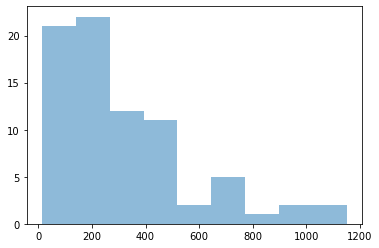

In [3]:
data = list(civilization_lifetimes.values())

%matplotlib inline
import matplotlib.pyplot as plt

nbins = 9
_ = plt.hist(data, bins=nbins, alpha=0.5)

## Summary Statistics of Ancient Civilization Lifetimes

In [4]:
import pandas as pd

df = pd.DataFrame(data)
df.describe()

,0
count,78.000000
mean,320.038462
std,254.551372
min,14.000000
25%,137.750000
50%,249.500000
75%,434.250000
max,1150.000000


## Best Fit Distribution

Find the continuous distribution that best fits the data.

The *best_fits* list, produced below, is ordered; best fit first. For each item in the list, there are three quantities:

* the distribution name (in SciPy),
* a list of the MLE parameter estimates (in scipy.stat's defined order),
* and the Kolmogorov-Smirnov Goodness-of-Fit p-value

In [5]:
import warnings
warnings.simplefilter('ignore')

# Find the probability distribution that best fits a set of continous data
import fitdist as fd

# SciPy supports over 100 continuous distributions.  Some are such a bad
# fit to the data here that they give fitdist fits :-)  So, drop them from
# consideration.
drop = ("argus",
        "betaprime",
        "bradford",
        "crystalball",
        'erlang',
        "exponweib",
        "gausshyper",
        "genhalflogistic",
        "gompertz",
        "kstwo",
        "kstwobign",
        "levy_stable",
        "loggamma",
        "lognorm",
        "norminvgauss",
        "studentized_range",
        "weibull_min",
        "weibull_max",
       )

# Only output distibutions that result in a Goodness-of-Fit
# value greater than or equal to gof.
gof = 0.90

# best_fits = find_best_fit_distributions(data, verbose_mode=True)
best_fits = fd.find_best_fit_distributions(data,
                                           dist_names=fd.cont_dist_names,
                                           verbose_mode=False,
                                           drop_dist_names=drop,
                                           goodness_of_fit_pvalue=gof
                                          )

best_fits

[['ncf',
  (1.1824619040854774,
   13.800963314821075,
   8.020123644854575,
   -0.2794032006246133,
   35.231897870173),
  0.9681358728316377],
 ['burr',
  (2.9104892962451565,
   0.46830383763499617,
   -3.1668612182320697,
   398.7381522618655),
  0.952814033523576],
 ['burr12',
  (1.4414552754648264,
   6.367861168141388,
   0.5294247248763146,
   1165.3930559561886),
  0.9438905494459793],
 ['genextreme',
  (-0.24835916558218313, 190.44067146680214, 150.76110775927),
  0.938369323613793],
 ['kappa3',
  (3.192369716382416, 13.991817600932315, 327.0555243752109),
  0.9364998561104025],
 ['fisk',
  (2.282335801944155, -24.727796180991454, 271.74177703829866),
  0.9203526825287708],
 ['f',
  (16252.36561000452,
   8.843351366961528,
   -146.3145683226483,
   364.9898245698539),
  0.9141864642235216],
 ['invgamma',
  (4.42169069432306, -146.41421832513623, 1614.2126312941346),
  0.9141819972922789]]

The <b>Generalized Extreme Value (GEV)</b> distribution is a good fit to the data, according to the Kolmogorov Goodness of Fit test, and there is a good rationale for using it.

The <b>exponential</b> distribution is NOT a good fit to the data:

In [6]:
expon_ranking = [result[0] for result in best_fits].index("expon")
best_fits[expon_ranking]

ValueError: 'expon' is not in list

The following plot shows the normalized histogram together with the GEV density function, based on the Maximum Likelihood Estimates (MLE) of the GEV's three parameters.

In [ ]:
from scipy.stats import genextreme
import numpy as np

pos = 3  # Select the 1st item in the best_fits list
mle = best_fits[pos][1]  # The 2nd item is a 3-tuple of MLE parameter estimates
dist_name = "genextreme"  # The 3rd item is SciPy's name for the GEV distribution
nbins = 9  # Number of bins to use for the histogram

x = np.linspace(genextreme.ppf(0.01, *mle), genextreme.ppf(0.98, *mle), 100)

plt.figure(figsize=(12,6))
plt.title('Ancient Civilization Lifespans')
plt.xlabel('Years')
plt.ylabel('Likelihood')
plt.plot(x, genextreme.pdf(x, *mle), 'r-', lw=3, alpha=0.6, label=dist_name)

_, _, _ = plt.hist(data, nbins, density=True, alpha=0.5)

In [ ]:
[fit[0] for fit in best_fits]

In [ ]:
best_fit_pdfs = [fd.make_fitted_pdf(fit[0], fit[1]) for fit in best_fits]

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Ancient Civilization Lifespans')
plt.xlabel('Years')
plt.ylabel('Likelihood')

ncf = best_fit_pdfs[0]
burr = best_fit_pdfs[1]
burr12 = best_fit_pdfs[2]
gev = best_fit_pdfs[3]

plt.title('Ancient Civilization Lifespans (red: NCF, blue: Burr, green: Burr12, yellow: GEV)')

plt.plot(x, gev(x), 'y-', lw=3, alpha=0.8, label='genextreme')
plt.plot(x, burr12(x), 'g-', lw=3, alpha=0.7, label='ncf')
plt.plot(x, burr(x), 'b-', lw=3, alpha=0.7, label='burr')
plt.plot(x, ncf(x), 'r-', lw=3, alpha=0.7, label='burr12')

_, _, _ = plt.hist(data, nbins, density=True, color='lightblue', alpha=0.6)

## The GEV's MLE Parameter Estimates

The following makes the MLE parameter estimates explicit.

In [ ]:
xi = mle[0]
mu = mle[1]
sigma = mle[2]
print("The location, scale, and shape parameters are {:.2f}, {:.2f}, and {:.2f}, resp.".format(mu, sigma, xi))

## An Observation & A Prediction

In [ ]:
max_lifetime = max(data)
max_names = [name for name in civilization_lifetimes if civilization_lifetimes[name] == max_lifetime]

print(f"The maximum recorded civilization lifetime is the {max_lifetime} years of the {max_names[0]}.")

In [ ]:
prob_of_higher = (1 - genextreme.cdf(max_lifetime, *mle)) * 100.0
print("The probability of seeing a future civilization with a lifetime higher than the {} is about {:.1f} percent.".format(max_names[0],
                                                                                                                           prob_of_higher))